In [30]:
import pandas as pd
import numpy as np
import os
from pathlib import Path


data_dir = "/Users/mouyasushi/Desktop/學校課程/econometrics/group/data"

excel_files = [f for f in os.listdir(data_dir) if f.endswith('.xlsx')]


dfs = []

column_mapping = {
    '年月日': 'date',
    '開盤價(元)': 'open',
    '最高價(元)': 'high',
    '最低價(元)': 'low',
    '收盤價(元)': 'close',
    '報酬率％': 'return',
    '成交量(千股)': 'volume(1000)',
    '成交值(千元)': 'volume_value(1000)',
    '市值(百萬元)': 'market_value(1000000)',
    '市值比重％': 'market_weight',
    '本益比-TEJ': 'pe_ratio',
    '週轉率％': 'turnover_rate',
    '成交筆數(筆)': 'trade_count',
    # 可以根据需要添加更多映射
}


for file in excel_files:
    file_path = os.path.join(data_dir, file)
    
    
    company_name = file.replace('.xlsx', '')
    
    try:
    
        df = pd.read_excel(file_path)
        
        if '年月日' in df.columns or '日期' in df.columns:
            pass
        else:
            for i, row in df.iterrows():
                if any(str(val).find('年月日') >= 0 or str(val).find('日期') >= 0 for val in row):
             
                    df.columns = row
             
                    df = df.iloc[i+1:].reset_index(drop=True)
                    break
        
        
        new_columns = {}
        for col in df.columns:
            if col in column_mapping:
                new_columns[col] = column_mapping[col]
            else:
        
                new_columns[col] = col
        
        df = df.rename(columns=new_columns)
        
        
        df['product'] = company_name
        
        
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'], errors='coerce')
        
        
        for col in df.columns:
            if col not in ['date', 'product']:
                try:
                    df[col] = pd.to_numeric(df[col], errors='coerce')
                except:
                    pass
        
        
        dfs.append(df)
        
        print(f"load {company_name}，rows：{len(df)}")
        
    except Exception as e:
        print(f"处理文件 {file} 时出错: {e}")


if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    

    if 'date' in combined_df.columns and 'company' in combined_df.columns:
        combined_df = combined_df.sort_values(['company', 'date'])
    

    combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]
    

    print("\n合并后的数据基本信息：")
    print(f"总行数: {len(combined_df)}")
    print(f"总列数: {combined_df.shape[1]}")
    print(f"列名: {combined_df.columns.tolist()}")
    
    # 显示前5行数据
    print("\n合并后的数据前5行：")
    print(combined_df.head())
else:
    print("没有成功处理任何文件")

load 6239，rows：957
load 2313，rows：957
load 2338，rows：957
load 3661，rows：957
load 8016，rows：957
load 3443，rows：957
load 3707，rows：957
load 2454，rows：957
load 3034，rows：957
load 3131，rows：957

合并后的数据基本信息：
总行数: 9570
总列数: 35
列名: ['date', 'open', 'high', 'low', 'close', 'volume(1000)', 'volume_value(1000)', 'return', 'turnover_rate', '流通在外股數(千股)', 'market_value(1000000)', '最後揭示賣價', '報酬率-Ln', 'market_weight', '成交值比重％', 'trade_count', '本益比-TSE', 'pe_ratio', '股價淨值比-TSE', '股價淨值比-TEJ', '漲跌停', '股價營收比-TEJ', '股利殖利率-TSE', '現金股利率', '股價漲跌(元)', '高低價差%', '次日開盤參考價', '次日漲停價', '次日跌停價', '注意股票(A)', '處置股票(D)', '全額交割(Y)', '市場別', '最後揭示買價', 'product']

合并后的数据前5行：
0       date     open     high      low    close  volume(1000)  \
0 2020-11-30  72.2480  73.1997  71.1377  72.9618         15553   
1 2020-11-27  72.2480  72.3273  71.4550  72.1687          4089   
2 2020-11-26  71.7722  72.3273  71.2964  72.2480          3910   
3 2020-11-25  73.3583  73.4376  71.2170  71.3757          8344   
4 2020-11-24  72.9618  73

In [31]:
col_to_keep = ['date', 'product', 'open', 'high', 'low', 'close', 'return', 'volume(1000)', 'volume_value(1000)', 'market_value(1000000)', 'market_weight', 'pe_ratio', 'turnover_rate', 'trade_count']
combined_df = combined_df[col_to_keep]
combined_df

,date,product,open,high,low,close,return,volume(1000),volume_value(1000),market_value(1000000),market_weight,pe_ratio,turnover_rate,trade_count
0,2020-11-30,6239,72.2480,73.1997,71.1377,72.9618,1.0989,15553,1422498,71681,0.173,10.2841,1.9962,5721
1,2020-11-27,6239,72.2480,72.3273,71.4550,72.1687,-0.1098,4089,370227,70902,0.169,10.1723,0.5248,2566
2,2020-11-26,6239,71.7722,72.3273,71.2964,72.2480,1.2222,3910,354482,70980,0.170,10.1835,0.5018,2576
3,2020-11-25,6239,73.3583,73.4376,71.2170,71.3757,-1.3158,8344,759771,70123,0.169,10.0605,1.0709,4177
4,2020-11-24,6239,72.9618,73.3583,72.1687,72.3273,0.1098,6066,555947,71058,0.170,10.1947,0.7785,4007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,2017-01-09,3131,137.0322,137.0322,133.4636,134.5342,-1.3089,73,13811,4653,0.171,11.8200,0.2958,71
9566,2017-01-06,3131,135.2479,136.6753,134.8910,136.3184,1.5957,96,18307,4715,0.171,11.9700,0.3889,103
9567,2017-01-05,3131,133.4636,134.5342,133.4636,134.1773,0.2667,36,6789,4641,0.169,11.7900,0.1458,45
9568,2017-01-04,3131,134.8910,135.2479,133.8205,133.8205,-0.5305,48,9066,4628,0.170,11.7500,0.1945,67


check data quality 

In [33]:
from eda import inspect_columns

inspect_columns(combined_df)

,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
0,,,,,,,,
date,False,957,False,0.00,2020-11-30 00:00:00,2019-11-29 00:00:00,2017-01-03 00:00:00,datetime64[ns]
product,False,10,False,0.00,6239,2454,3131,object
open,False,5461,False,0.00,72.248,314.2138,134.891,float64
high,False,5559,False,0.00,73.1997,316.3858,135.2479,float64
low,False,5456,False,0.00,71.1377,304.0779,134.1773,float64
close,False,5529,False,0.00,72.9618,305.1639,134.5342,float64
return,False,5958,False,0.00,1.0989,-2.3175,0.5333,float64
volume(1000),False,6498,False,0.00,15553,11677,37,int64
volume_value(1000),False,9536,False,0.00,1422498,4988662,6981,int64


In [34]:
if 'date' in combined_df.columns:
    combined_df['date'] = pd.to_datetime(combined_df['date'], errors  = 'coerce')

combined_df = combined_df.sort_values('date', ascending=True)


In [35]:
combined_df.groupby('product').size()

product
2313    957
2338    957
2454    957
3034    957
3131    957
3443    957
3661    957
3707    957
6239    957
8016    957
dtype: int64

## query data tool 

In [36]:
from eda import query_data
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:

j = query_data(combined_df, product='2338', date=None)

In [49]:
j.head()

,date,product,open,high,low,close,return,volume(1000),volume_value(1000),market_value(1000000),market_weight,pe_ratio,turnover_rate,trade_count
2870,2017-01-03,2338,7.4356,7.4952,7.3590,7.3590,0.1157,101,885,2186,0.008,NaN,0.0400,63
2869,2017-01-04,2338,7.3675,7.5207,7.3420,7.4101,0.6936,257,2247,2201,0.008,NaN,0.1017,108
2868,2017-01-05,2338,7.3675,7.4271,7.3420,7.4271,0.2296,366,3182,2206,0.008,NaN,0.1448,153
2867,2017-01-06,2338,7.4016,7.4867,7.3761,7.4867,0.8018,266,2332,2224,0.008,NaN,0.1053,114
2866,2017-01-09,2338,7.4867,7.6143,7.4101,7.4952,0.1136,883,7838,2226,0.008,NaN,0.3494,215


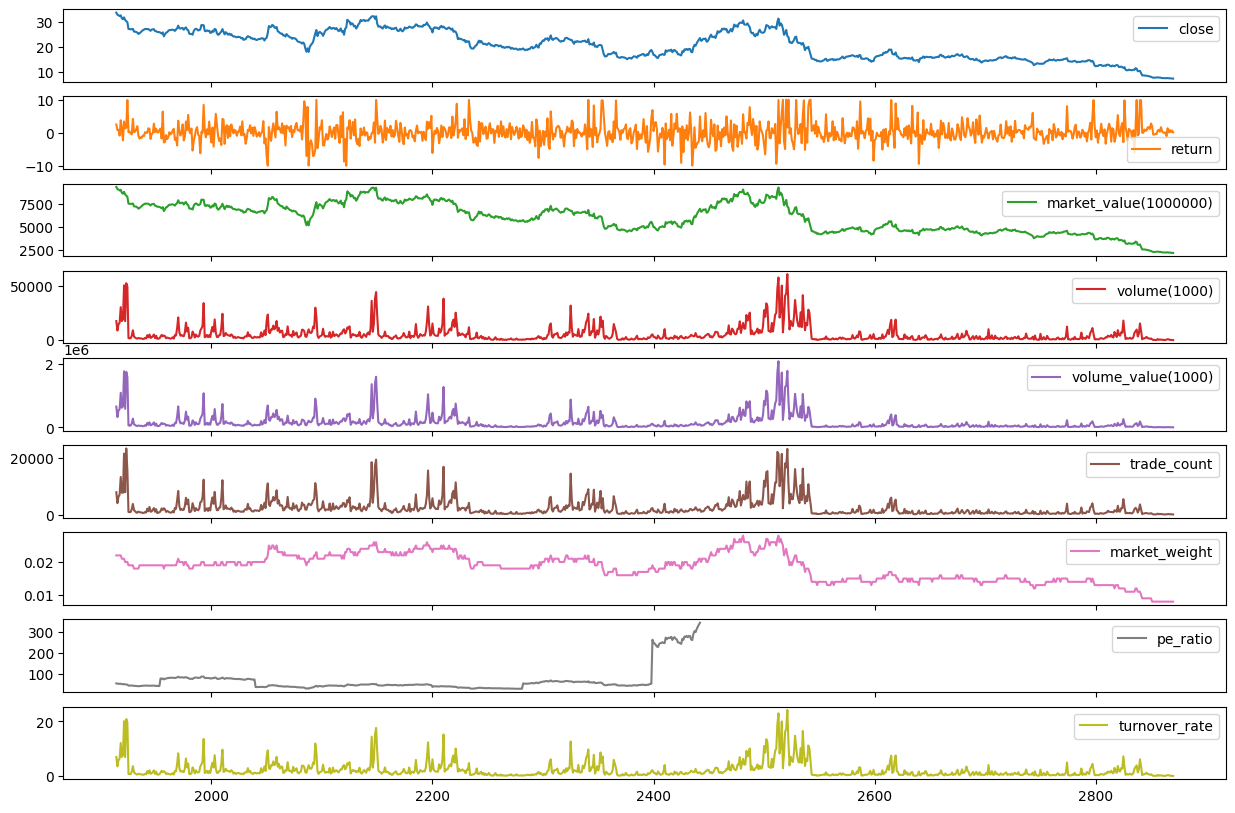

In [50]:
import matplotlib.pyplot as plt
to_plot = ['close', 'return', 'market_value(1000000)', 'volume(1000)', 'volume_value(1000)', 'trade_count', 'market_weight', 'pe_ratio', 'turnover_rate']

j[to_plot].plot(subplots=True, figsize=(15, 10))
plt.show()

## fill nan 

In [43]:
combined_df.isna().sum()

0
date                        0
product                     0
open                        0
high                        0
low                         0
close                       0
return                      0
volume(1000)                0
volume_value(1000)          0
market_value(1000000)       0
market_weight               0
pe_ratio                 1408
turnover_rate               0
trade_count                 0
dtype: int64

In [44]:
# 查看所有有 pe_ratio 缺失的產品
pe_missing_by_product = combined_df[combined_df['pe_ratio'].isna()]['product'].value_counts()
print("所有有 pe_ratio 缺失的產品:")
print(pe_missing_by_product)  # 這會顯示所有有缺失的產品



所有有 pe_ratio 缺失的產品:
product
3707    796
2338    428
3661    184
Name: count, dtype: int64


In [86]:
# combined_df.to_csv('combined_df.csv', index=False)

In [85]:
combined_df.head()

,date,open,high,low,close,return,market_value,market_weight,pe_ratio,turnover_rate,product
8612,2017-01-03,9.4055,9.5452,9.3589,9.4055,0.0000,1704,0.063,NaN,0.2022,漢磊
956,2017-01-03,29.4574,29.6919,28.8007,28.8476,-1.6000,1867,0.007,NaN,1.0115,世芯
6698,2017-01-03,134.8910,135.2479,134.1773,134.5342,0.5333,4653,0.171,11.82,0.1499,紅素
1913,2017-01-03,56.4759,56.7370,55.9536,56.5412,-0.4598,67474,0.247,14.75,0.2525,力成
2870,2017-01-03,60.7376,61.0227,60.4524,61.0227,0.4695,65111,0.239,12.36,0.1394,聯詠
